In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 그리기위한 기본 설정
# 폰트설정 - 윈도우
plt.rcParams['font.family'] = 'Malgun Gothic'
# 폰트설정 - 맥
# plt.rcParams['font.family'] = 'AppleGothic'
# 그래프의 크기
plt.rcParams['figure.figsize'] = 12, 6
# 글자크기
plt.rcParams['font.size'] = 14
# 적용한 폰트에 - 기호가 없다면 깨진다. - 기호는 설정한 폰트의
# 영향을 받지 않도록 설정한다.
plt.rcParams['axes.unicode_minus'] = False

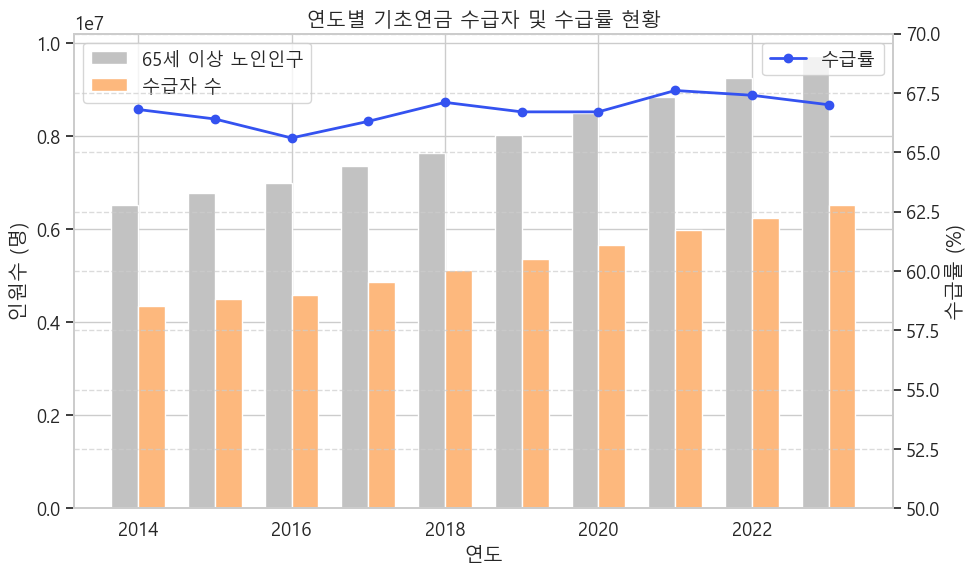

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'data/연도별 기초연금 수급률_전처리.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

# 컬럼명 공백 제거
df.columns = df.columns.str.strip()

# 쉼표 및 % 제거 후 숫자 변환
df['65세 이상 노인인구'] = df['65세 이상 노인인구'].str.replace(',', '').astype(int)
df['수급자 수'] = df['수급자 수'].str.replace(',', '').astype(int)
df['수급률'] = df['수급률'].str.replace('%', '').astype(float)

# 시각화 시작
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대그래프 색상 설정
color_recipient = '#FDB87D'
color_population = '#c2c2c2'

# 막대그래프
bar_width = 0.35
ax1.bar(df['연도'] - bar_width/2, df['65세 이상 노인인구'], width=bar_width, label='65세 이상 노인인구', color=color_population)
ax1.bar(df['연도'] + bar_width/2, df['수급자 수'], width=bar_width, label='수급자 수', color=color_recipient)

ax1.set_xlabel('연도')
ax1.set_ylabel('인원수 (명)')
ax1.legend(loc='upper left')

# 꺾은선그래프 (수급률)
ax2 = ax1.twinx()
ax2.plot(df['연도'], df['수급률'], color='#3452F0', marker='o', linewidth=2, label='수급률')  # 요청 색상
ax2.set_ylabel('수급률 (%)')
ax2.set_ylim(50, 70)
ax2.legend(loc='upper right')

plt.title('연도별 기초연금 수급자 및 수급률 현황')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


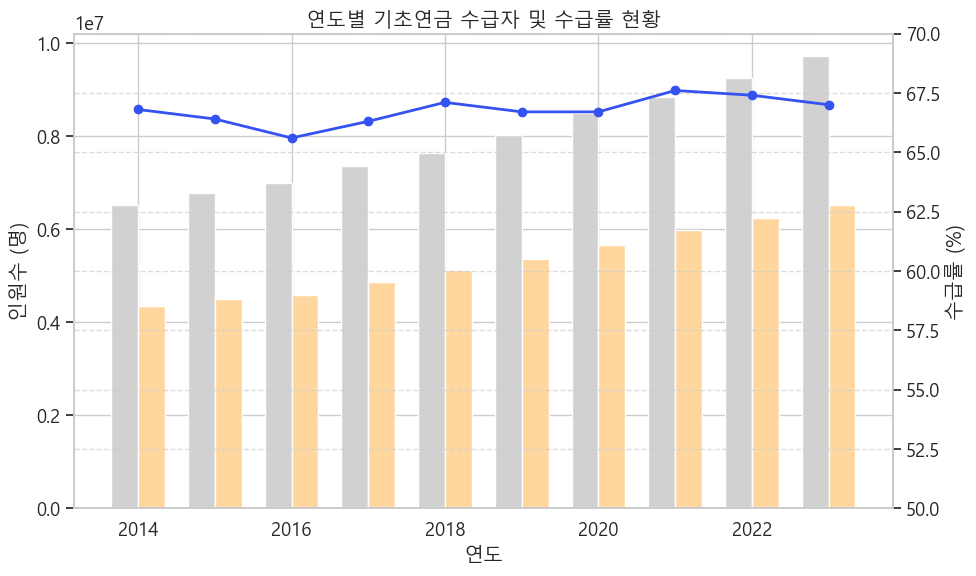

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
file_path = 'data/연도별 기초연금 수급률_전처리.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

# 컬럼명 공백 제거
df.columns = df.columns.str.strip()

# 쉼표 및 % 제거 후 숫자 변환
df['65세 이상 노인인구'] = df['65세 이상 노인인구'].str.replace(',', '').astype(int)
df['수급자 수'] = df['수급자 수'].str.replace(',', '').astype(int)
df['수급률'] = df['수급률'].str.replace('%', '').astype(float)

# 시각화 시작
fig, ax1 = plt.subplots(figsize=(10, 6))

# 막대그래프 색상 설정
color_recipient = '#ffd79e'
color_population = '#D1D1D1'

# 막대그래프
bar_width = 0.35
ax1.bar(df['연도'] - bar_width/2, df['65세 이상 노인인구'], width=bar_width, color=color_population)
ax1.bar(df['연도'] + bar_width/2, df['수급자 수'], width=bar_width, color=color_recipient)

ax1.set_xlabel('연도')
ax1.set_ylabel('인원수 (명)')

# 꺾은선그래프 (수급률)
ax2 = ax1.twinx()
ax2.plot(df['연도'], df['수급률'], color='#3452F0', marker='o', linewidth=2)

ax2.set_ylabel('수급률 (%)')
ax2.set_ylim(50, 70)

# ✅ 범례 삭제
# ax1.legend().remove() 또는 생략
# ax2.legend().remove() 또는 생략

plt.title('연도별 기초연금 수급자 및 수급률 현황')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


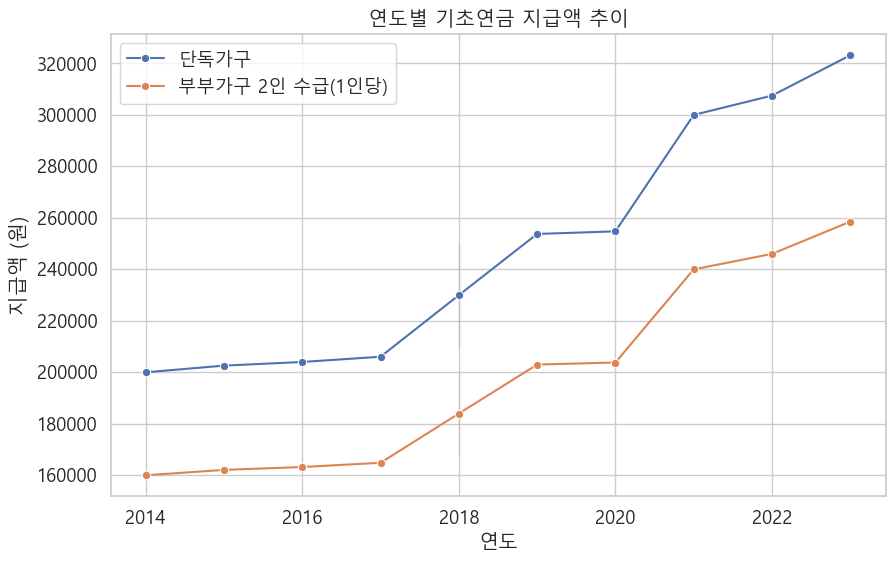

In [3]:
# 파일 경로
file_path = 'data/연도별 기초연금 가구별 지급액_전처리.csv'

# 데이터 불러오기
df = pd.read_csv(file_path)

# 컬럼명 공백 제거
df.columns = df.columns.str.strip()

# '연도' 컬럼 소수점 제거 (혹은 필요한 경우 반올림)
df['연도'] = df['연도'].astype(int)

# 지급액 컬럼 쉼표 제거 후 숫자형으로 변환
for col in ['단독가구', '부부가구 2인 수급(1인당)']:
    df[col] = df[col].astype(str).str.replace(',', '').astype(int)

# 시각화 스타일 설정
sns.set(style='whitegrid', font='Malgun Gothic', font_scale=1.2)

# 라인차트 그리기
plt.figure(figsize=(10, 6))
for col in ['단독가구', '부부가구 2인 수급(1인당)']:
    sns.lineplot(x='연도', y=col, data=df, marker='o', label=col)

# 제목 및 축 레이블 추가
plt.title('연도별 기초연금 지급액 추이')
plt.xlabel('연도')
plt.ylabel('지급액 (원)')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()
